In [32]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data_heart = pd.read_csv('heart.csv')
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data_heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data_heart.shape

(303, 14)

In [6]:
data_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
z_thalach=-((3*22.905161)-149.646865)
print(z_thalach)
data_heart[data_heart.thalach<z_thalach]

80.93138199999999


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [8]:
z_chol=(3*51.830751)+246.264026
print(z_chol)
data_heart[data_heart.chol>z_chol]

401.756279


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [9]:
z_trestbps=(3*17.538143)+131.623762
print(z_trestbps)
data_heart[data_heart.trestbps>z_trestbps]

184.238191


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [10]:
data_heart =data_heart[data_heart.thalach>z_thalach]

In [11]:
 data_heart =data_heart[data_heart.chol<z_chol]

In [12]:
  data_heart =data_heart[data_heart.trestbps<z_trestbps]

In [13]:
  data_heart.shape

(296, 14)

In [14]:
data_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
data_heart['target'].value_counts()

1    163
0    133
Name: target, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

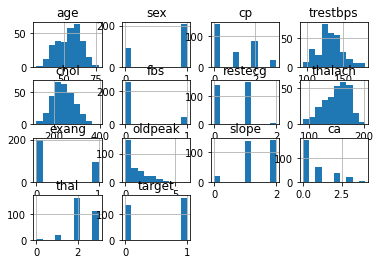

In [16]:
data_heart.hist()

In [17]:
for x in data_heart.index:
    if data_heart.loc[x, 'thal']==3 :
        data_heart.loc[x, 'thal']=1


In [18]:
#model prep
y = data_heart["target"]
x = data_heart.drop('target',axis=1)

In [19]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [20]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 296, dtype: int64


In [21]:
#splitting the data into traning nd test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state = 2)
print("-------------------------------TEST---------------------------------------")
print(x_test)
print("-------------------------------TRAIN---------------------------------------")
print(x_train)

-------------------------------TEST---------------------------------------
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
43    53    0   0       130   264    0        0      143      0      0.4   
88    54    0   2       110   214    0        1      158      0      1.6   
208   49    1   2       120   188    0        1      139      0      2.0   
199   65    1   0       110   248    0        0      158      0      0.6   
21    44    1   2       130   233    0        1      179      1      0.4   
259   38    1   3       120   231    0        1      182      1      3.8   
124   39    0   2        94   199    0        1      179      0      0.0   
185   44    1   0       112   290    0        0      153      0      0.0   
254   59    1   3       160   273    0        0      125      0      0.0   
156   47    1   2       130   253    0        1      179      0      0.0   
81    45    1   1       128   308    0        0      170      0      0.0   
59    57    0

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("-------------------------------TEST---------------------------------------")
print(x_test)
print("------------------------------TRAIN----------------------------------------")
print(x_train)

-------------------------------TEST---------------------------------------
[[-1.69291510e-01 -1.49428134e+00 -9.30815779e-01 -1.04810776e-01
   4.46036850e-01 -4.03189256e-01 -1.03857191e+00 -2.82817301e-01
  -7.36534901e-01 -5.66658536e-01 -6.57680445e-01 -7.09393376e-01
   9.11829271e-01]
 [-5.80023835e-02 -1.49428134e+00  1.03054604e+00 -1.29687551e+00
  -6.25468612e-01 -4.03189256e-01  8.46835555e-01  3.74551869e-01
  -7.36534901e-01  5.11820613e-01 -6.57680445e-01 -7.09393376e-01
   9.11829271e-01]
 [-6.14448014e-01  6.69218022e-01  1.03054604e+00 -7.00843144e-01
  -1.18265145e+00 -4.03189256e-01  8.46835555e-01 -4.58115747e-01
  -7.36534901e-01  8.71313663e-01 -6.57680445e-01  2.29809471e+00
  -1.02683477e+00]
 [ 1.16617800e+00  6.69218022e-01 -9.30815779e-01 -1.29687551e+00
   1.03155102e-01 -4.03189256e-01 -1.03857191e+00  3.74551869e-01
  -7.36534901e-01 -3.86912011e-01  9.93517268e-01  1.29559868e+00
  -1.02683477e+00]
 [-1.17089364e+00  6.69218022e-01  1.03054604e+00 -1.0481

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(296, 13) (236, 13) (60, 13)


In [24]:
#logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict_test = lr.predict(x_test)
lr_conf_matrix_test = confusion_matrix(y_test, lr_predict_test)
lr_acc_score_test = accuracy_score(y_test, lr_predict_test)
print("confussion matrix Test data:")
print(lr_conf_matrix_test)
print("\n")
lr_predict_train = lr.predict(x_train)
lr_conf_matrix_train = confusion_matrix(y_train, lr_predict_train)
lr_acc_score_train = accuracy_score(y_train, lr_predict_train)
print("confussion matrix Train data:")
print(lr_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of Logistic Regression:",lr_acc_score_test*100,'\n')
print(classification_report(y_test,lr_predict_test))
print("\n")
print("Train data")
print("Accuracy of Logistic Regression:",lr_acc_score_train*100,'\n')
print(classification_report(y_train,lr_predict_train))

confussion matrix Test data:
[[18  9]
 [ 4 29]]


confussion matrix Train data:
[[ 85  21]
 [ 14 116]]


Test data
Accuracy of Logistic Regression: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.76      0.88      0.82        33

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.79      0.78      0.78        60



Train data
Accuracy of Logistic Regression: 85.16949152542372 

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       106
           1       0.85      0.89      0.87       130

    accuracy                           0.85       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.85      0.85      0.85       236



In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predict_test = knn.predict(x_test)
knn_conf_matrix_test = confusion_matrix(y_test, knn_predict_test)
knn_acc_score_test = accuracy_score(y_test, knn_predict_test)
print("confussion matrix Test data:")
print(knn_conf_matrix_test)
print("\n")
knn_predict_train = knn.predict(x_train)
knn_conf_matrix_train = confusion_matrix(y_train, knn_predict_train)
knn_acc_score_train = accuracy_score(y_train, knn_predict_train)
print("confussion matrix Train data:")
print(knn_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of KNN:",knn_acc_score_test*100,'\n')
print(classification_report(y_test,knn_predict_test))
print("\n")
print("Train data")
print("Accuracy of KNN:",knn_acc_score_train*100,'\n')
print(classification_report(y_train,knn_predict_train))

confussion matrix Test data:
[[19  8]
 [ 3 30]]


confussion matrix Train data:
[[ 86  20]
 [ 14 116]]


Test data
Accuracy of KNN: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.79      0.91      0.85        33

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



Train data
Accuracy of KNN: 85.59322033898306 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       106
           1       0.85      0.89      0.87       130

    accuracy                           0.86       236
   macro avg       0.86      0.85      0.85       236
weighted avg       0.86      0.86      0.86       236



In [26]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predict_test = dt.predict(x_test)
dt_conf_matrix_test = confusion_matrix(y_test, dt_predict_test)
dt_acc_score_test = accuracy_score(y_test, dt_predict_test)
print("confussion matrix Test data:")
print(dt_conf_matrix_test)
print("\n")
dt_predict_train = dt.predict(x_train)
dt_conf_matrix_train = confusion_matrix(y_train, dt_predict_train)
dt_acc_score_train = accuracy_score(y_train, dt_predict_train)
print("confussion matrix Train data:")
print(dt_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of dt:",dt_acc_score_test*100,'\n')
print(classification_report(y_test,dt_predict_test))
print("\n")
print("Train data")
print("Accuracy of dt:",dt_acc_score_train*100,'\n')
print(classification_report(y_train,dt_predict_train))

confussion matrix Test data:
[[17 10]
 [ 6 27]]


confussion matrix Train data:
[[104   2]
 [  6 124]]


Test data
Accuracy of dt: 73.33333333333333 

              precision    recall  f1-score   support

           0       0.74      0.63      0.68        27
           1       0.73      0.82      0.77        33

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.73      0.73      0.73        60



Train data
Accuracy of dt: 96.61016949152543 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       106
           1       0.98      0.95      0.97       130

    accuracy                           0.97       236
   macro avg       0.96      0.97      0.97       236
weighted avg       0.97      0.97      0.97       236



In [27]:
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict_test = nb.predict(x_test)
nb_conf_matrix_test = confusion_matrix(y_test, nb_predict_test)
nb_acc_score_test = accuracy_score(y_test, nb_predict_test)
print("confussion matrix Test data:")
print(nb_conf_matrix_test)
print("\n")
nb_predict_train = nb.predict(x_train)
nb_conf_matrix_train = confusion_matrix(y_train, nb_predict_train)
nb_acc_score_train = accuracy_score(y_train, nb_predict_train)
print("confussion matrix Train data:")
print(nb_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of nb:",nb_acc_score_test*100,'\n')
print(classification_report(y_test,nb_predict_test))
print("\n")
print("Train data")
print("Accuracy of nb:",nb_acc_score_train*100,'\n')
print(classification_report(y_train,nb_predict_train))

confussion matrix Test data:
[[19  8]
 [ 2 31]]


confussion matrix Train data:
[[ 83  23]
 [ 15 115]]


Test data
Accuracy of nb: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.79      0.94      0.86        33

    accuracy                           0.83        60
   macro avg       0.85      0.82      0.83        60
weighted avg       0.84      0.83      0.83        60



Train data
Accuracy of nb: 83.89830508474576 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       106
           1       0.83      0.88      0.86       130

    accuracy                           0.84       236
   macro avg       0.84      0.83      0.84       236
weighted avg       0.84      0.84      0.84       236



In [28]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predict_test = svc.predict(x_test)
svc_conf_matrix_test = confusion_matrix(y_test, svc_predict_test)
svc_acc_score_test = accuracy_score(y_test, svc_predict_test)
print("confussion matrix Test data:")
print(svc_conf_matrix_test)
print("\n")
svc_predict_train = svc.predict(x_train)
svc_conf_matrix_train = confusion_matrix(y_train, svc_predict_train)
svc_acc_score_train = accuracy_score(y_train, svc_predict_train)
print("confussion matrix Train data:")
print(svc_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of svc:",svc_acc_score_test*100,'\n')
print(classification_report(y_test,svc_predict_test))
print("\n")
print("Train data")
print("Accuracy of svc:",svc_acc_score_train*100,'\n')
print(classification_report(y_train,svc_predict_train))

confussion matrix Test data:
[[16 11]
 [ 3 30]]


confussion matrix Train data:
[[ 98   8]
 [  4 126]]


Test data
Accuracy of svc: 76.66666666666667 

              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.73      0.91      0.81        33

    accuracy                           0.77        60
   macro avg       0.79      0.75      0.75        60
weighted avg       0.78      0.77      0.76        60



Train data
Accuracy of svc: 94.91525423728814 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       106
           1       0.94      0.97      0.95       130

    accuracy                           0.95       236
   macro avg       0.95      0.95      0.95       236
weighted avg       0.95      0.95      0.95       236



In [29]:
sgd= SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(x_train, y_train)
sgd_predict_test = sgd.predict(x_test)
sgd_conf_matrix_test = confusion_matrix(y_test, sgd_predict_test)
sgd_acc_score_test = accuracy_score(y_test, sgd_predict_test)
print("confussion matrix Test data:")
print(sgd_conf_matrix_test)
print("\n")
sgd_predict_train = sgd.predict(x_train)
sgd_conf_matrix_train = confusion_matrix(y_train, sgd_predict_train)
sgd_acc_score_train = accuracy_score(y_train, sgd_predict_train)
print("confussion matrix Train data:")
print(sgd_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of sgd:",sgd_acc_score_test*100,'\n')
print(classification_report(y_test,sgd_predict_test))
print("\n")
print("Train data")
print("Accuracy of sgd:",sgd_acc_score_train*100,'\n')
print(classification_report(y_train,sgd_predict_train))

confussion matrix Test data:
[[11 16]
 [ 7 26]]


confussion matrix Train data:
[[ 75  31]
 [ 21 109]]


Test data
Accuracy of sgd: 61.66666666666667 

              precision    recall  f1-score   support

           0       0.61      0.41      0.49        27
           1       0.62      0.79      0.69        33

    accuracy                           0.62        60
   macro avg       0.62      0.60      0.59        60
weighted avg       0.62      0.62      0.60        60



Train data
Accuracy of sgd: 77.96610169491525 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       106
           1       0.78      0.84      0.81       130

    accuracy                           0.78       236
   macro avg       0.78      0.77      0.77       236
weighted avg       0.78      0.78      0.78       236



C:\Users\udayr\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [30]:
nn = MLPClassifier(random_state=1, max_iter=300)
nn.fit(x_train, y_train)
nn_predict_test = nn.predict(x_test)
nn_conf_matrix_test = confusion_matrix(y_test, nn_predict_test)
nn_acc_score_test = accuracy_score(y_test, nn_predict_test)
print("confussion matrix Test data:")
print(nn_conf_matrix_test)
print("\n")
nn_predict_train = nn.predict(x_train)
nn_conf_matrix_train = confusion_matrix(y_train, nn_predict_train)
nn_acc_score_train = accuracy_score(y_train, nn_predict_train)
print("confussion matrix Train data:")
print(nn_conf_matrix_train)
print("\n")
print("Test data")
print("Accuracy of nn:",nn_acc_score_test*100,'\n')
print(classification_report(y_test,nn_predict_test))
print("\n")
print("Train data")
print("Accuracy of nn:",nn_acc_score_train*100,'\n')
print(classification_report(y_train,nn_predict_train))

confussion matrix Test data:
[[18  9]
 [ 4 29]]


confussion matrix Train data:
[[ 98   8]
 [  3 127]]


Test data
Accuracy of nn: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.76      0.88      0.82        33

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.79      0.78      0.78        60



Train data
Accuracy of nn: 95.33898305084746 

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       106
           1       0.94      0.98      0.96       130

    accuracy                           0.95       236
   macro avg       0.96      0.95      0.95       236
weighted avg       0.95      0.95      0.95       236



C:\Users\udayr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
cross_val_score( LogisticRegression(),x,y,cv=2)

C:\Users\udayr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\udayr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.87837838, 0.83108108])

[78.33333333 81.66666667 76.66666667 73.33333333 83.33333333 70.
 78.33333333]
['LR' 'KNN' 'SVC' 'DT' 'NB' 'SGD' 'NN']


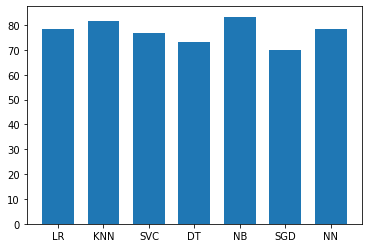

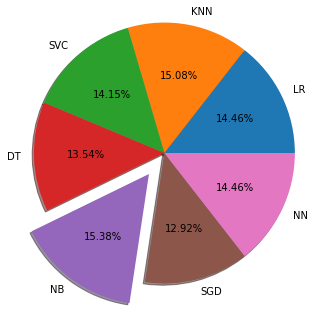

In [269]:
x_plot = np.array(["LR", "KNN","SVC", "DT", "NB", "SGD", "NN"])
y_plot = np.array([lr_acc_score_test*100,knn_acc_score_test*100,svc_acc_score_test*100,dt_acc_score_test*100,nb_acc_score_test*100,sgd_acc_score_test*100,nn_acc_score_test*100])
print(y_plot)
print(x_plot)
plt.bar(x_plot,y_plot,width=0.7)
plt.show()
explode_val=[0, 0,0, 0, 0.3, 0, 0]
plt.pie(y_plot,labels=x_plot,autopct='%0.2f%%',shadow=True,explode=explode_val,radius=1.5)
plt.show()


In [244]:
#Prediction Model
input=(52,1,0,112,230,0,1,160,0,0,2,1,2)
input_array=np.asarray(input)
input_reshaped=input_array.reshape(1,-1)
pred1=lr.predict(input_reshaped)
pred2=knn.predict(input_reshaped)
pred3=dt.predict(input_reshaped)
pred4=nb.predict(input_reshaped)
pred5=svc.predict(input_reshaped)
pred6=sgd.predict(input_reshaped)
pred6=nn.predict(input_reshaped)
print(" LR prediction:",pred1)
print("KNN prediction:",pred2)
print(" DT prediction:",pred3)
print(" NB prediction:",pred4)
print("SVC prediction:",pred5)
print("SGD prediction:",pred6)
print(" NN prediction:",pred6)

 LR prediction: [0]
KNN prediction: [1]
 DT prediction: [0]
 NB prediction: [0]
SVC prediction: [1]
SGD prediction: [0]
 NN prediction: [0]


In [ ]:
import librosa